<a href="https://colab.research.google.com/github/SEOYUNJE/Endoscope-Object-Detection/blob/main/Yolo/ColonoScopy/Inference/baseline_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/seoyunje/colonoscopy-rtdetr')
od.download('https://www.kaggle.com/datasets/seoyunje/colonoscopy-256x256-resized-png')
od.download('https://www.kaggle.com/datasets/msyu78/metadataset')

Skipping, found downloaded files in "./colonoscopy-rtdetr" (use force=True to force download)
Skipping, found downloaded files in "./colonoscopy-256x256-resized-png" (use force=True to force download)
Skipping, found downloaded files in "./metadataset" (use force=True to force download)


## 1. Import Library
___

In [2]:
!pip install -q colorama

In [3]:
import os
from tqdm import tqdm

import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

from colorama import Fore

import cv2
from PIL import Image

import torch
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore')

#### Configuration

In [4]:
class CFG:
    output_dir = 'runs/predict'
    seed = 42

    model_name = 'RTDETR_L'
    img_size = [256,256]
    num_classes = 3 # Ulcer, Polyp, Cancer

    conf = 0.0
    iou =0.7
    max_det = 100
    save_txt = True
    save_conf = True

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
print(f'{Fore.LIGHTGREEN_EX}Installing ultralytics')
!pip install -q ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/235.7 GB disk)


In [6]:
from ultralytics import RTDETR

## 2. Model Predict
___

In [7]:
model = RTDETR('rtdetr-l.pt')
model = RTDETR(f'/content/colonoscopy-rtdetr/runs/detect/train/weights/best.pt')

In [8]:
results = model.predict(source='/content/colonoscopy-256x256-resized-png/test',
                       imgsz = CFG.img_size[0],
                       device=0,
                       conf=CFG.conf,
                       iou=CFG.iou,
                       max_det=CFG.max_det,
                       agnostic_nms=False,
                       classes = [0,1,2], # ulcer, polyp, cancer
                       exist_ok=True,
                       project=f'/content/{CFG.output_dir}',
                       augment=False,
                       fliplr=0.0,
                       save_txt=CFG.save_txt,
                       save_conf=CFG.save_conf,
                       )


image 1/400 /content/colonoscopy-256x256-resized-png/test/2_1_00002.png: 256x256 294 ulcers, 4 polyps, 2 cancers, 91.4ms
image 2/400 /content/colonoscopy-256x256-resized-png/test/2_1_00004.png: 256x256 294 ulcers, 2 polyps, 4 cancers, 113.2ms
image 3/400 /content/colonoscopy-256x256-resized-png/test/2_1_00006.png: 256x256 291 ulcers, 9 cancers, 133.1ms
image 4/400 /content/colonoscopy-256x256-resized-png/test/2_1_00007.png: 256x256 294 ulcers, 1 polyp, 5 cancers, 91.6ms
image 5/400 /content/colonoscopy-256x256-resized-png/test/2_1_00048.png: 256x256 290 ulcers, 2 polyps, 8 cancers, 87.9ms
image 6/400 /content/colonoscopy-256x256-resized-png/test/2_1_00062.png: 256x256 293 ulcers, 7 cancers, 65.7ms
image 7/400 /content/colonoscopy-256x256-resized-png/test/2_1_00079.png: 256x256 295 ulcers, 1 polyp, 4 cancers, 132.7ms
image 8/400 /content/colonoscopy-256x256-resized-png/test/2_1_00102.png: 256x256 292 ulcers, 4 polyps, 4 cancers, 98.6ms
image 9/400 /content/colonoscopy-256x256-resized-p

#### Predicted Results

In [9]:
test_df = pd.read_csv('/content/colonoscopy-256x256-resized-png/test_meta.csv')
display(test_df)

,image_id,height,width
0,2_1_00002.png,2048,2048
1,2_1_00004.png,2048,2048
2,2_1_00006.png,2048,2048
3,2_1_00007.png,2048,2048
4,2_1_00048.png,2048,2048
...,...,...,...
395,2_3_10237.png,2048,2048
396,2_3_10243.png,2048,2048
397,2_3_10247.png,2048,2048
398,2_3_10251.png,2048,2048


Results saved to /content/runs/predict/example
1 label saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
2 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
3 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
4 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
5 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
6 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
7 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
8 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
9 labels saved to /content/runs/predict/example/labels
Results saved to /content/runs/predict/example
10 labels saved to /content/runs/pre

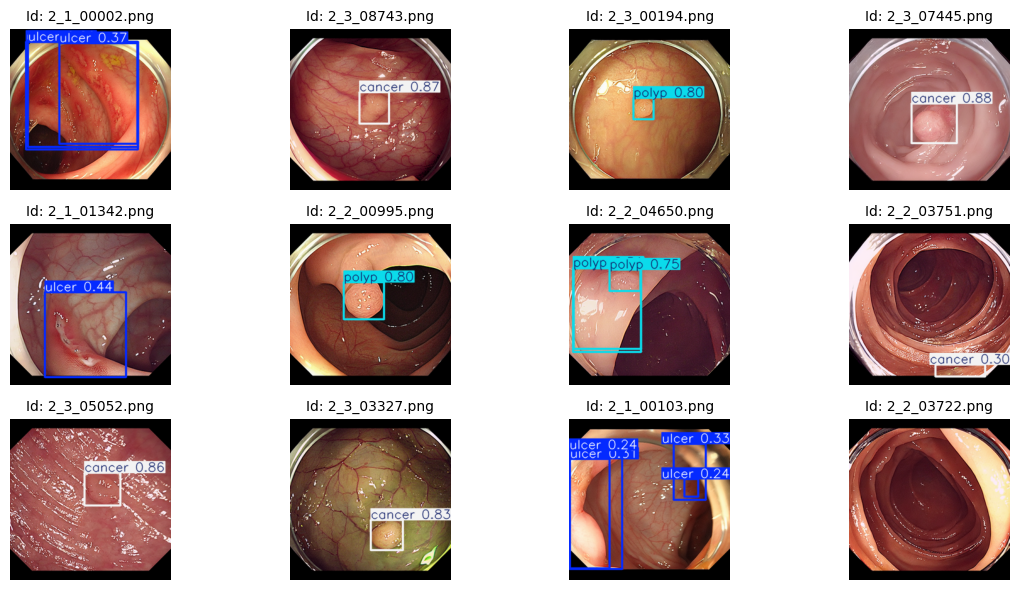

In [10]:
plt.figure(figsize=(12,6))


for i, id_ in enumerate(test_df['image_id'][np.random.randint(0,len(test_df), 12)]):
    result_example = model.predict(source=f'/content/colonoscopy-256x256-resized-png/test/{id_}',
                                   imgsz = CFG.img_size[0],
                                   device = 0,
                                   conf = 0.2,
                                   iou = 0.5,
                                   max_det= 10,
                                   project = f'/content/{CFG.output_dir}',
                                   name = 'example',
                                   )
    plt.subplot(3,4,i+1)
    im_bgr = result_example[0].plot(line_width=2) ## BGR order numpy array
    im_rgb = im_bgr[:,:,::-1]
    plt.title(f'Id: {id_}', size=10)
    plt.imshow(im_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3. Build Predict Submission
___

In [67]:
def format_pred(labels, bboxes, scores):
    pred_strings = []
    for label, score, bbox in zip(labels, scores, bboxes):
        xmin, ymin, xmax, ymax = bbox.astype(np.float32)
        pred_strings.append(f"{label} {score} {xmin} {ymin} {xmax} {ymax}")

    return " ".join(pred_strings)

#### Method1: save_text=True

In [111]:
def yolo2voc(image_height, image_width, bboxes):
    """[xmid, ymid, w, h] (normalized)"""
    bboxes = bboxes.copy().astype(float)

    bboxes[:, [0, 2]] *= image_width   # xmid, w
    bboxes[:, [1, 3]] *= image_height

    xmin = bboxes[:, 0] - (bboxes[:, 2] / 2)
    ymin = bboxes[:, 1] - (bboxes[:, 3] / 2)
    xmax = bboxes[:, 0] + (bboxes[:, 2] / 2)
    ymax = bboxes[:, 1] + (bboxes[:, 3] / 2)

    return np.stack([xmin, ymin, xmax, ymax], axis=1)

In [112]:
if CFG.save_txt:
    result_list = []

    for file_path in tqdm(glob('/content/runs/predict/predict/labels/*txt')):
        image_id = file_path.split('/')[-1].split('.')[0] + '.png'

        w, h = test_df.loc[test_df.image_id==image_id, ['width','height']].values[0]
        with open(file_path, mode='r') as f:
            text = f.read()
        data = np.array(text.replace('\n',' ').strip().split(' ')).astype(np.float32).reshape(-1,6)
        data = data[:, [0, 5, 1, 2, 3, 4]] # class, conf, x, y, w, h(yolo)

        ## Scaling, Yolo -> Pascal Voc
        voc_bboxes = yolo2voc(h, w, data[:,2:])

        bboxes = np.concatenate((data[:,:2], voc_bboxes), axis=1)

        result = {'image_id': image_id,
                 'PredictionString': format_pred(bboxes[:,0].astype(int),
                                               bboxes[:,2:],
                                               bboxes[:,1])}
        result_list.append(result)


100%|██████████| 400/400 [00:02<00:00, 189.76it/s]


#### Method2: save_text =False

In [113]:
if not CFG.save_txt:
   result_list = []

   for i, predict in enumerate(tqdm(results, total=len(results), desc='Building Submisiion')):
       pred_classes = predict.boxes.cls
       pred_scores = predict.boxes.conf
       pred_boxes = predict.boxes.xyxyn

       image_id = predict.path.split('/')[-1]
       width, height = test_df.loc[test_df.image_id == image_id, ['width','height']].values[0]

       pred_boxes[:,[0,2]] *= width
       pred_boxes[:,[1,3]] *= height

       pred_classes_array = pred_classes.cpu().numpy().astype(int)
       pred_scores_array = pred_scores.cpu().numpy().astype(float)
       pred_boxes_array = pred_boxes.cpu().numpy().astype(float)

       result = {'image_id': image_id,
              'PredictionString': format_pred(pred_classes_array,
                                              pred_boxes_array,
                                              pred_scores_array)}
       result_list.append(result)

In [114]:
submission_det = pd.DataFrame(result_list, columns=['image_id','PredictionString'])
submission_det.to_csv('/content/submission.csv', index=False)
display(submission_det)

,image_id,PredictionString
0,2_3_07678.png,2 0.798895001411438 1073.21240234375 861.76562...
1,2_3_00297.png,2 0.7654290199279785 1226.482666015625 147.123...
2,2_3_09554.png,2 0.8965139985084534 693.6658325195312 1128.73...
3,2_1_02323.png,0 0.43379101157188416 1271.8182373046875 321.7...
4,2_1_00004.png,0 0.5870980024337769 428.56341552734375 651.45...
...,...,...
395,2_3_05191.png,2 0.8293259739875793 362.2707214355469 533.852...
396,2_1_02890.png,0 0.3614940047264099 849.0556640625 182.738952...
397,2_3_01859.png,2 0.7597349882125854 967.86328125 689.94458007...
398,2_3_01702.png,2 0.8646199703216553 717.1470947265625 295.415...


## 4. Inference
___

In [115]:
def string_decoder(predict_string):
    s = predict_string.split(' ')
    class_id = [x for x in (s[0::6])]
    score = [x for x in (s[1::6])]
    x_min = [x for x in (s[2::6])]
    y_min = [x for x in (s[3::6])]
    x_max = [x for x in (s[4::6])]
    y_max = [x for x in (s[5::6])]

    return class_id, score, x_min, y_min, x_max, y_max

In [116]:
!pip install -q map-boxes
from map_boxes import mean_average_precision_for_boxes

In [117]:
submission_list = []

for i, row in tqdm(submission_det.iterrows(), total=len(submission_det)):
    image_id = row['image_id']
    string_decoded = string_decoder(row['PredictionString'])

    for  (class_id, score, xmin, ymin, xmax, ymax) in zip(*string_decoded):
        submission_list.append(
            {
                'image_id': image_id,
                'lesion_label': int(class_id),
                'score': float(score),
                'x_min': float(xmin),
                'y_min': float(ymin),
                'x_max': float(xmax),
                'y_max': float(ymax),
                }
        )

submission_metric = pd.DataFrame(submission_list, columns=['image_id', 'lesion_label', 'score','x_min','y_min', 'x_max', 'y_max'])

100%|██████████| 400/400 [00:00<00:00, 678.56it/s]


In [118]:
meta_data = pd.read_csv('/content/metadataset/colonoscopy_data2.csv')
test_id = [x.split('/')[-1] for x in glob('/content/colonoscopy-256x256-resized-png/test/*.png')]
test_df = meta_data[meta_data['image_id'].isin(test_id)]
test_df = test_df.sort_values(by='image_id').reset_index(drop=True)

In [119]:
ann = test_df.copy()
det = submission_metric.copy()

ann = ann[['image_id','lesion_label','x_min','x_max','y_min','y_max']].values

det = det[['image_id','lesion_label', 'score','x_min','x_max','y_min','y_max']].values

mean_ap_50, average_precisions_50 = mean_average_precision_for_boxes(ann, det, iou_threshold=0.5)
mean_ap_75, average_precisions_75 = mean_average_precision_for_boxes(ann, det, iou_threshold=0.75)

Number of files in annotations: 400
Number of files in predictions: 400
Unique classes: 3
Detections length: 400
Annotations length: 400
0                              | 0.202132 |     180
1                              | 0.577430 |     116
2                              | 0.727804 |     200
mAP: 0.502455
Number of files in annotations: 400
Number of files in predictions: 400
Unique classes: 3
Detections length: 400
Annotations length: 400
0                              | 0.073240 |     180
1                              | 0.500544 |     116
2                              | 0.572725 |     200
mAP: 0.382170
